In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("Train_Data.csv")
test = pd.read_csv("Test_Data.csv")
ds = pd.read_csv("Sample_Submission.csv")

In [5]:
pd.set_option('display.max_columns', None)
#to view all columns
df.head(5)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,277,15,0.0,0.0,1.0,1.0,0.05,0.06,0.00,255,15,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,tcp,smtp,SF,1239,400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,116,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,tcp,http,SF,222,945,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,25,0.0,0.0,0.0,0.0,1.00,0.00,0.08,57,255,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,tcp,http,SF,235,1380,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,256,3,0.0,0.0,1.0,1.0,0.01,0.06,0.00,255,3,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


In [8]:
pd.set_option('display.max_columns', None)
test.head(5)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,tcp,mtp,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,7,0.0,0.0,1.0,1.0,0.03,0.07,0.0,255,7,0.03,0.08,0.0,0.0,0.0,0.0,1.0,1.0,20
1,0,tcp,http,SF,199,1721,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,10,0.0,0.0,0.0,0.0,1.00,0.00,0.2,255,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0,tcp,discard,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,6,1.0,1.0,0.0,0.0,0.38,0.38,0.0,255,14,0.05,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
3,0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,297,10,1.0,1.0,0.0,0.0,0.03,0.05,0.0,255,2,0.01,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
4,0,tcp,exec,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,19,1.0,1.0,0.0,0.0,0.18,0.06,0.0,255,16,0.06,0.06,0.0,0.0,1.0,1.0,0.0,0.0,20


In [9]:
df.wrongfragment.value_counts()

wrongfragment
0    86845
Name: count, dtype: int64

In [10]:
df.urgent.value_counts()

urgent
0    86843
2        1
1        1
Name: count, dtype: int64

In [11]:
df.numfailedlogins.value_counts()

numfailedlogins
0    86796
1       38
3        5
2        5
4        1
Name: count, dtype: int64

In [12]:
df.rootshell.value_counts()

rootshell
0    86728
1      117
Name: count, dtype: int64

In [13]:
df.attack.value_counts()

attack
0    53847
1    32998
Name: count, dtype: int64

In [ ]:
#we can see that the data is imbalanced

In [14]:
df.isguestlogin.value_counts()

isguestlogin
0    86145
1      700
Name: count, dtype: int64

In [15]:
df.ishostlogin.value_counts()

ishostlogin
0    86844
1        1
Name: count, dtype: int64

In [16]:
#here axis=1 represents that the operation should be on column
#axis=0 is for rows and axis=1 is for columns

df = df.drop(["land", "wrongfragment", "urgent", "numfailedlogins", "rootshell", "numoutboundcmds", "ishostlogin", "isguestlogin"], axis=1)
test = dt.drop(["land", "wrongfragment", "urgent", "numfailedlogins", "rootshell", "numoutboundcmds", "ishostlogin", "isguestlogin"], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   hot                     86845 non-null  int64  
 7   loggedin                86845 non-null  int64  
 8   numcompromised          86845 non-null  int64  
 9   suattempted             86845 non-null  int64  
 10  numroot                 86845 non-null  int64  
 11  numfilecreations        86845 non-null  int64  
 12  numshells               86845 non-null  int64  
 13  numaccessfiles          86845 non-null  int64  
 14  count                   86845 non-null

In [18]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
hot                       0
loggedin                  0
numcompromised            0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate         0
dsthostsrvrerrorrate      0
lastflag                  0
attack                    0
dtype: int64

In [ ]:
#we can see that we dont have any null values
#we can conclude that the dataset given is not that complex

In [19]:
df.describe()

,duration,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,numroot,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.144971,0.441142,0.320583,0.001267,0.356382,0.014370,0.000357,0.004548,79.584939,21.308838,0.324545,0.323482,0.091022,0.091223,0.639490,0.045231,0.078523,186.012067,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522,0.379964
std,1038.273538,3.582141e+05,5.543041e+04,1.837958,0.496527,27.993474,0.048450,28.415210,0.528799,0.020072,0.104986,98.068071,48.212191,0.464948,0.464469,0.286221,0.285844,0.444652,0.122168,0.222239,95.946960,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425,0.485380
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,93.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,17.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,40504.000000,8.958152e+07,7.028652e+06,77.000000,1.000000,7479.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [20]:
#splitting columns acc to their data types

numericals = df.select_dtypes(include=["int64", "float64"]).columns
categories = df.select_dtypes(include="object").columns

In [21]:
len(numericals)

32

In [22]:
categories = ['protocoltype', 'service', 'flag', "suattempted"]

In [24]:
numericals = ['duration', 'srcbytes', 'dstbytes', 'hot', 'loggedin', 'numcompromised', 'numroot', 'numfilecreations', 'numshells',
       'numaccessfiles', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag']

In [43]:
ul = df.dsthostsrvdiffhostrate.quantile(0.99)
ll = df.dsthostsrvdiffhostrate.quantile(0.00)
df2 = df[(df["dsthostsrvdiffhostrate"] <= ul) & (df["dsthostsrvdiffhostrate"] >= ll)]
df2

#Purpose: The code filters out rows in the DataFrame df where the dsthostsrvdiffhostrate column is outside the range defined by the 0th and 99th percentiles.
#Result: dff contains only the rows where the dsthostsrvdiffhostrate values are between the minimum value and the 99th percentile value.

#This approach is often used to remove outliers or focus on the central portion of the data.

,duration,protocoltype,service,flag,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,numroot,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,0,0,0,0,277,15,0.0,0.0,1.0,1.0,0.05,0.06,0.00,255,15,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,1
1,0,tcp,smtp,SF,1239,400,0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,116,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,0
2,0,tcp,http,SF,222,945,0,1,0,0,0,0,0,0,21,25,0.0,0.0,0.0,0.0,1.00,0.00,0.08,57,255,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,0
3,0,tcp,http,SF,235,1380,0,1,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,0,0,0,0,256,3,0.0,0.0,1.0,1.0,0.01,0.06,0.00,255,3,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,1,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,106,116,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,0
86841,0,tcp,http,SF,368,1725,0,1,0,0,0,0,0,0,19,19,0.0,0.0,0.0,0.0,1.00,0.00,0.00,39,178,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,0
86842,28,tcp,ftp,SF,1483,4152,30,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,148,42,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,0
86843,0,tcp,smtp,SF,1679,385,0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,41,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,0


C:\Users\kumar\AppData\Local\Temp\ipykernel_13412\2451939875.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.dsthostsrvdiffhostrate)
C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dsthostsrvdiffhostrate', ylabel='Density'>

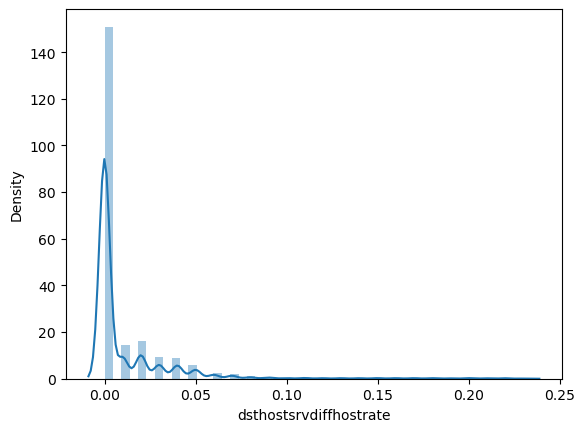

In [44]:
sns.distplot(df2.dsthostsrvdiffhostrate)

C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='srvdiffhostrate', ylabel='Count'>

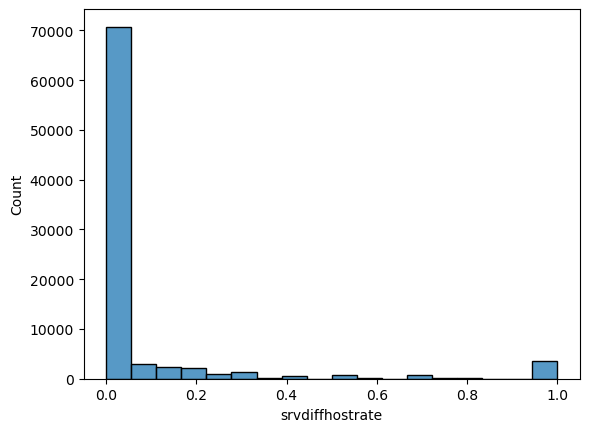

In [45]:
sns.histplot(df.srvdiffhostrate)

In [46]:
ul1 = df.srvdiffhostrate.quantile(0.99)
ll1 = df.srvdiffhostrate.quantile(0.01)

In [47]:
df1 = df[(df.srvdiffhostrate < 0.9)]

In [48]:
df.srvdiffhostrate > 0.9

0        False
1        False
2        False
3        False
4        False
         ...  
86840    False
86841    False
86842    False
86843    False
86844    False
Name: srvdiffhostrate, Length: 86845, dtype: bool

In [49]:
df.diffsrvrate.quantile(0.99)

0.75

In [50]:
df.diffsrvrate.quantile(0.01)

0.0

In [51]:
df3 = df2[(df2["diffsrvrate"] <= 0.75) & (df2["diffsrvrate"] >= 0.0)]
df3

,duration,protocoltype,service,flag,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,numroot,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,0,0,0,0,277,15,0.0,0.0,1.0,1.0,0.05,0.06,0.00,255,15,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,1
1,0,tcp,smtp,SF,1239,400,0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,116,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,0
2,0,tcp,http,SF,222,945,0,1,0,0,0,0,0,0,21,25,0.0,0.0,0.0,0.0,1.00,0.00,0.08,57,255,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,0
3,0,tcp,http,SF,235,1380,0,1,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,0,0,0,0,256,3,0.0,0.0,1.0,1.0,0.01,0.06,0.00,255,3,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,1,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,106,116,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,0
86841,0,tcp,http,SF,368,1725,0,1,0,0,0,0,0,0,19,19,0.0,0.0,0.0,0.0,1.00,0.00,0.00,39,178,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,0
86842,28,tcp,ftp,SF,1483,4152,30,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,148,42,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,0
86843,0,tcp,smtp,SF,1679,385,0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,41,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,0


In [52]:
df3 = df3.drop(["numcompromised", "numroot"], axis=1)
test = test.drop(["numcompromised", "numroot"], axis=1)

In [53]:
df.numroot.describe()

count    86845.000000
mean         0.356382
std         28.415210
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7468.000000
Name: numroot, dtype: float64

C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Count'>

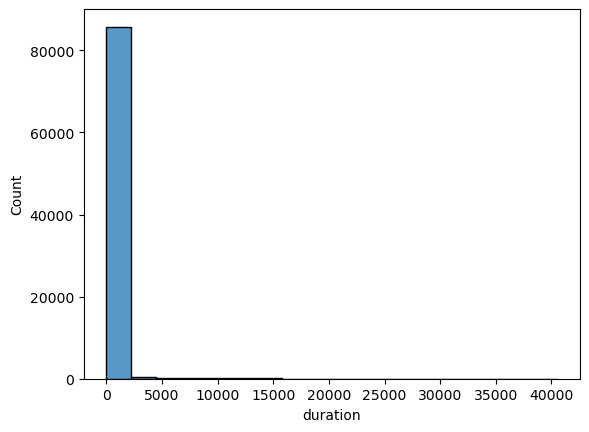

In [54]:
sns.histplot(df.duration)

In [55]:
encoder = LabelEncoder()
df3.attack = encoder.fit_transform(df3["attack"])

#LabelEncoder is used to convert categorical labels into numerical values.

In [56]:
df3.attack

0        1
1        0
2        0
3        0
4        1
        ..
86840    0
86841    0
86842    0
86843    0
86844    0
Name: attack, Length: 85192, dtype: int64

In [57]:
df.attack.value_counts()

attack
0    53847
1    32998
Name: count, dtype: int64

In [58]:
df3.attack.value_counts()

attack
0    52265
1    32927
Name: count, dtype: int64

In [59]:
categories

['protocoltype', 'service', 'flag', 'suattempted']

In [60]:
df4 = df3.drop(['protocoltype', 'service', 'flag', 'suattempted', "hot", "dstbytes", "srcbytes", "duration", "numfilecreations", "numshells", "numaccessfiles", "srvcount", "srvdiffhostrate", "dsthostsamesrcportrate", "dsthostsrvdiffhostrate", "lastflag"], axis=1)


<Axes: >

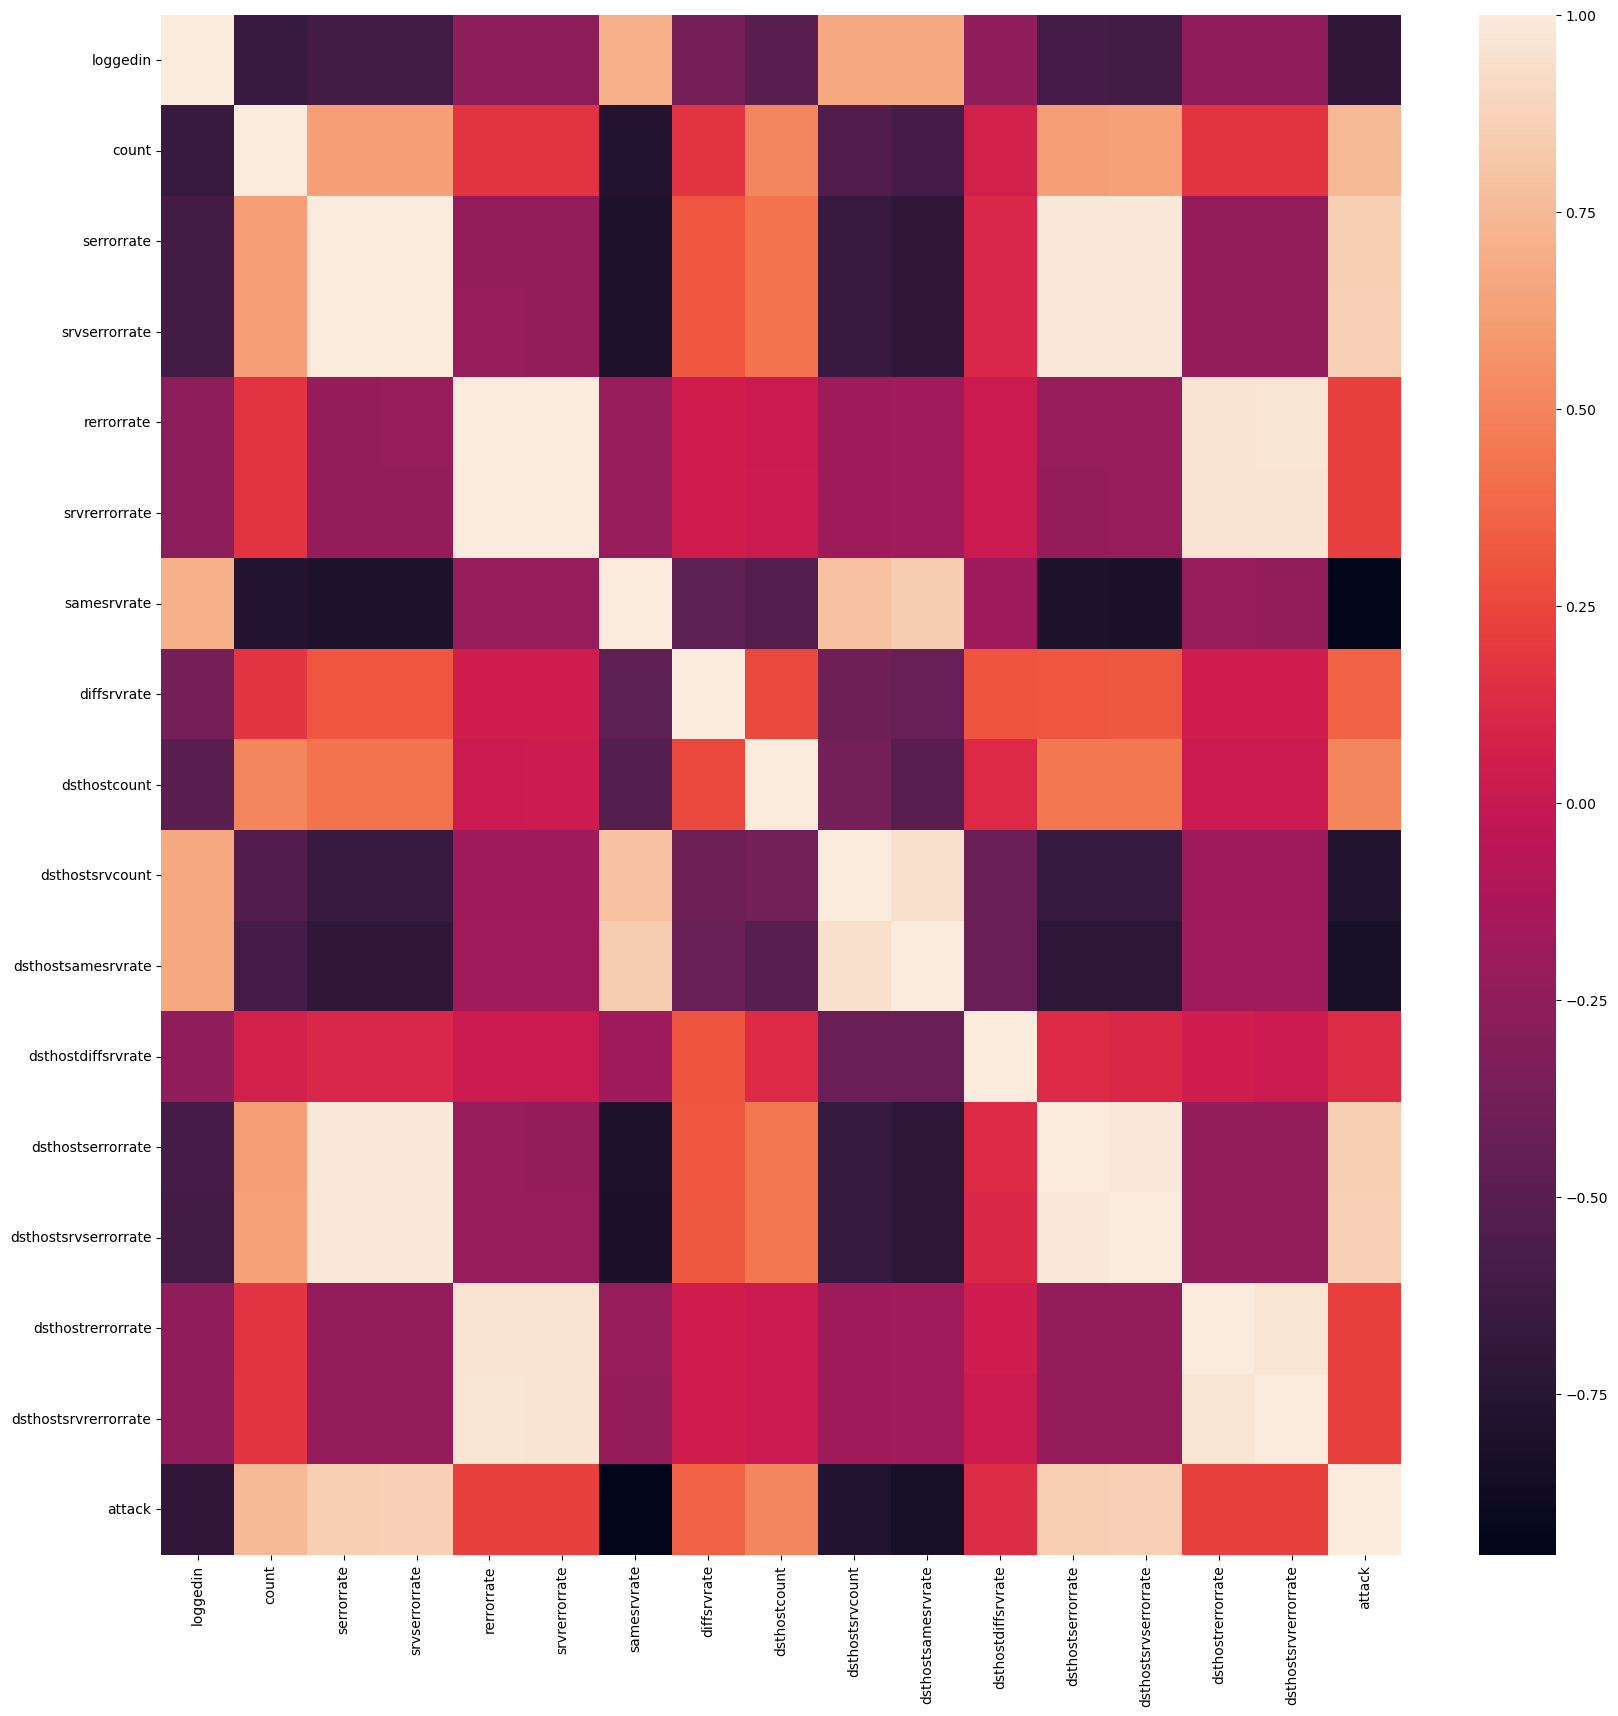

In [61]:
plt.figure(figsize=(20, 20))
sns.heatmap(df4.corr())

In [62]:
df3 = pd.get_dummies(df3, columns=['protocoltype', 'service', 'flag', 'suattempted'], dtype=int, drop_first=True)
test = pd.get_dummies(test, columns=['protocoltype', 'service', 'flag', 'suattempted'], dtype=int, drop_first=True)
df3

,duration,srcbytes,dstbytes,hot,loggedin,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,0,0,0,0,0,0,0,277,15,0.0,0.0,1.0,1.0,0.05,0.06,0.00,255,15,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1239,400,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,116,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,222,945,0,1,0,0,0,21,25,0.0,0.0,0.0,0.0,1.00,0.00,0.08,57,255,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,235,1380,0,1,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,256,3,0.0,0.0,1.0,1.0,0.01,0.06,0.00,255,3,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,216,674,0,1,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,106,116,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86841,0,368,1725,0,1,0,0,0,19,19,0.0,0.0,0.0,0.0,1.00,0.00,0.00,39,178,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86842,28,1483,4152,30,1,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,148,42,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [63]:
df3.columns

Index(['duration', 'srcbytes', 'dstbytes', 'hot', 'loggedin',
       'numfilecreations', 'numshells', 'numaccessfiles', 'count', 'srvcount',
       ...
       'flag_RSTO', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'suattempted_1', 'suattempted_2'],
      dtype='object', length=106)

In [64]:
test.columns

Index(['duration', 'srcbytes', 'dstbytes', 'hot', 'loggedin',
       'numfilecreations', 'numshells', 'numaccessfiles', 'count', 'srvcount',
       ...
       'flag_RSTO', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'suattempted_1', 'suattempted_2'],
      dtype='object', length=104)

In [65]:
df3 = df3.drop("service_tftp_u", axis=1)

In [66]:
df3

,duration,srcbytes,dstbytes,hot,loggedin,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,0,0,0,0,0,0,0,277,15,0.0,0.0,1.0,1.0,0.05,0.06,0.00,255,15,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1239,400,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,116,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,222,945,0,1,0,0,0,21,25,0.0,0.0,0.0,0.0,1.00,0.00,0.08,57,255,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,235,1380,0,1,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,256,3,0.0,0.0,1.0,1.0,0.01,0.06,0.00,255,3,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,216,674,0,1,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,106,116,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86841,0,368,1725,0,1,0,0,0,19,19,0.0,0.0,0.0,0.0,1.00,0.00,0.00,39,178,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86842,28,1483,4152,30,1,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,148,42,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86843,0,1

In [67]:
test

,duration,srcbytes,dstbytes,hot,loggedin,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,0,0,0,0,0,0,0,249,7,0.0,0.0,1.0,1.0,0.03,0.07,0.00,255,7,0.03,0.08,0.00,0.00,0.0,0.0,1.0,1.0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,199,1721,0,1,0,0,0,9,10,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,16,6,1.0,1.0,0.0,0.0,0.38,0.38,0.00,255,14,0.05,0.09,0.00,0.00,1.0,1.0,0.0,0.0,18,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,297,10,1.0,1.0,0.0,0.0,0.03,0.05,0.00,255,2,0.01,0.09,0.00,0.00,1.0,1.0,0.0,0.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,104,19,1.0,1.0,0.0,0.0,0.18,0.06,0.00,255,16,0.06,0.06,0.00,0.00,1.0,1.0,0.0,0.0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21707,0,273,4367,0,1,0,0,0,12,12,0.0,0.0,0.0,0.0,1.00,0.00,0.00,33,255,1.00,0.00,0.03,0.01,0.0,0.0,0.0,0.0,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21708,0,45,45,0,0,0,0,0,126,206,0.0,0.0,0.0,0.0,1.00,0.00,0.01,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,18,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21709,0,0,0,0,0,0,0,0,280,10,1.0,1.0,0.0,0.0,0.04,0.06,0.00,255,10,0.04,0.08,0.00,0.00,1.0,1.0,0.0,0.0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21710,0,29,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,86,45,0.47,0.07,0.47,

In [68]:
scaler = MinMaxScaler()
scaler.fit(df3)
scaler.fit(test)
df3

#The MinMaxScaler transforms features by scaling each feature to a given range, typically between 0 and 1.

,duration,srcbytes,dstbytes,hot,loggedin,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,0,0,0,0,0,0,0,277,15,0.0,0.0,1.0,1.0,0.05,0.06,0.00,255,15,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1239,400,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,116,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,222,945,0,1,0,0,0,21,25,0.0,0.0,0.0,0.0,1.00,0.00,0.08,57,255,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,235,1380,0,1,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,256,3,0.0,0.0,1.0,1.0,0.01,0.06,0.00,255,3,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,216,674,0,1,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,106,116,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86841,0,368,1725,0,1,0,0,0,19,19,0.0,0.0,0.0,0.0,1.00,0.00,0.00,39,178,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86842,28,1483,4152,30,1,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,148,42,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86843,0,1

In [69]:
test

,duration,srcbytes,dstbytes,hot,loggedin,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,0,0,0,0,0,0,0,249,7,0.0,0.0,1.0,1.0,0.03,0.07,0.00,255,7,0.03,0.08,0.00,0.00,0.0,0.0,1.0,1.0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,199,1721,0,1,0,0,0,9,10,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,16,6,1.0,1.0,0.0,0.0,0.38,0.38,0.00,255,14,0.05,0.09,0.00,0.00,1.0,1.0,0.0,0.0,18,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,297,10,1.0,1.0,0.0,0.0,0.03,0.05,0.00,255,2,0.01,0.09,0.00,0.00,1.0,1.0,0.0,0.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,104,19,1.0,1.0,0.0,0.0,0.18,0.06,0.00,255,16,0.06,0.06,0.00,0.00,1.0,1.0,0.0,0.0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21707,0,273,4367,0,1,0,0,0,12,12,0.0,0.0,0.0,0.0,1.00,0.00,0.00,33,255,1.00,0.00,0.03,0.01,0.0,0.0,0.0,0.0,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21708,0,45,45,0,0,0,0,0,126,206,0.0,0.0,0.0,0.0,1.00,0.00,0.01,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,18,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21709,0,0,0,0,0,0,0,0,280,10,1.0,1.0,0.0,0.0,0.04,0.06,0.00,255,10,0.04,0.08,0.00,0.00,1.0,1.0,0.0,0.0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21710,0,29,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,86,45,0.47,0.07,0.47,

In [71]:
scaler = StandardScaler()
#The StandardScaler transforms features so that they have a mean of 0 and a standard deviation of 1.
# x_scaled=original feature value minus feature mean whole by feature std dev

knn = KNeighborsClassifier()
clf = svm.SVC(kernel="linear")

In [72]:
x_train, x_test, y_train, y_test = train_test_split(df3.drop("attack", axis=1), df3["attack"], test_size=0.3, random_state=42)
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [73]:
prediction = clf.predict(x_test)

In [74]:
accuracy_score(y_test, prediction)

1.0

In [75]:
f1_score(y_test, prediction)

1.0

In [77]:
pred = clf.predict(test)

In [78]:
ds

,attack
0,0
1,0
2,0
3,1
4,1
...,...
21707,0
21708,1
21709,0
21710,0


In [79]:
pred = encoder.inverse_transform(pred)

In [80]:
ds["attack"] = pd.DataFrame(pred)

In [87]:
ds

,attack
0,1
1,0
2,1
3,1
4,1
...,...
21707,0
21708,0
21709,1
21710,0


In [92]:
#oe = OrdinalEncoder(categories=[["normal", "neptune"]])
#The OrdinalEncoder transforms categorical data into integer codes.
ds.attack = oe.fit_transform(ds[["attack"]])

ValueError: invalid literal for int() with base 10: 'normal'

In [89]:
ds.attack = ds.attack.astype(int)
ds

,attack
0,1
1,0
2,1
3,1
4,1
...,...
21707,0
21708,0
21709,1
21710,0


In [93]:
ds.to_csv("Kumar.csv", index=False)